## Question 1: Data Visualization
This notebook contains the interactive code for analyzing the data and visualization using different types of plots. Seaborn is used to display the data and visualization. 

In [44]:
# imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np

In [45]:
# Loading the data in pandas dataframe
football = pd.read_csv('football_data.csv', index_col=0)

In [46]:
# Basic EDA to check the columns and their datatype.
football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

## Visualization 1: Histogram of count of players according to their height or other attributes

Height is mentioned in original data in the form of string of ft-inch, for e.g. 5'10. We convert it into float datatype to numerize it for easy plotting. We replace ' with . to convert it into decimal form.

In [47]:
# preprocessing 'Height'
def str_to_float(x):
    if isinstance(x, str) == True:
        if x.find('\'') > -1:
            x = x.replace('\'', '.')
    else:
        x = np.nan
    return float(x)

football['processed_height'] = football['Height'].apply(str_to_float)

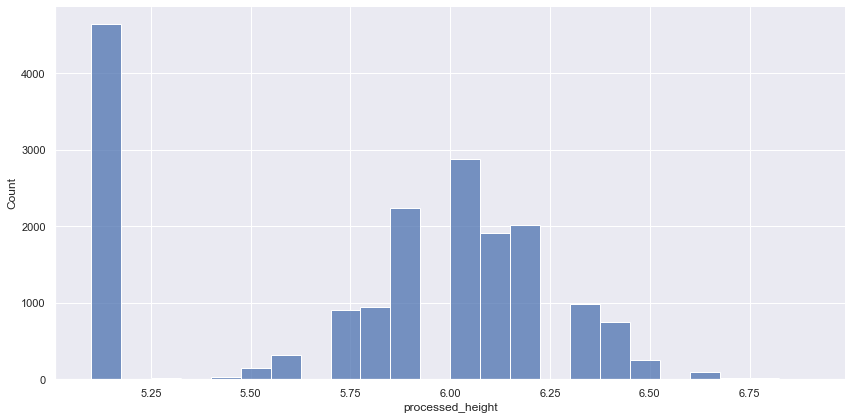

In [48]:
sns.displot(football, x='processed_height', height=6, aspect=2)

#### Observation
From above plot, we can infer that there is a height value around 5.2 which has abnormally high count of players. Rest of the values follow the near Gaussian distribution, with mean around 6.

### Pre-processing other attributes like value and wage for further analysis
We normalize the values given in 'K' or 'M'(for million) using below heuristics.

In [49]:
football['processed_value'] = pd.Series([float(str[1:-1]) if str[-1]=='K' else float(str[1:-1])*1000 if str[-1]=='M' else 0 for str in football['Value']])
football['processed_wage'] = pd.Series([float(str[1:-1]) if len(str)>=3 else 0 for str in football['Wage']])

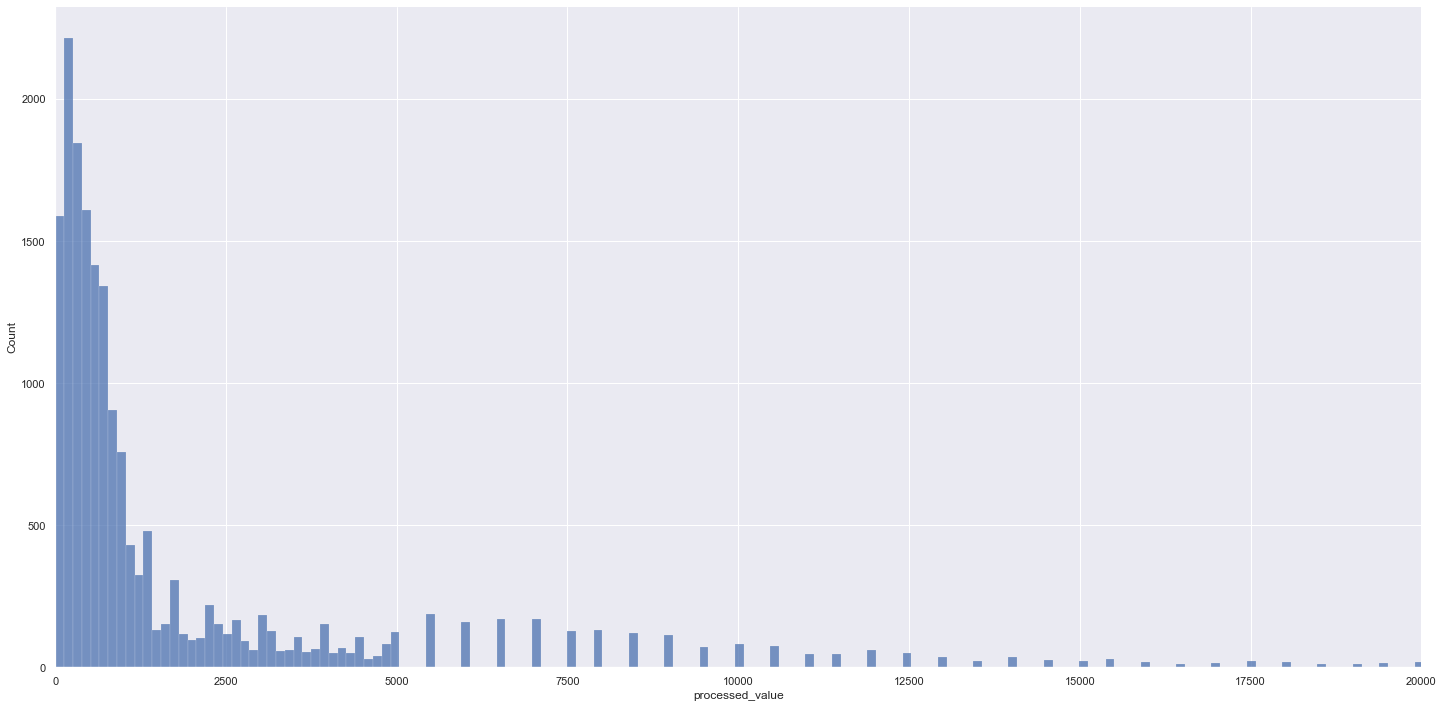

In [55]:
sns.displot(football, x='processed_value', height=10, aspect=2)
plt.xlim(0, 20000)
plt.show()

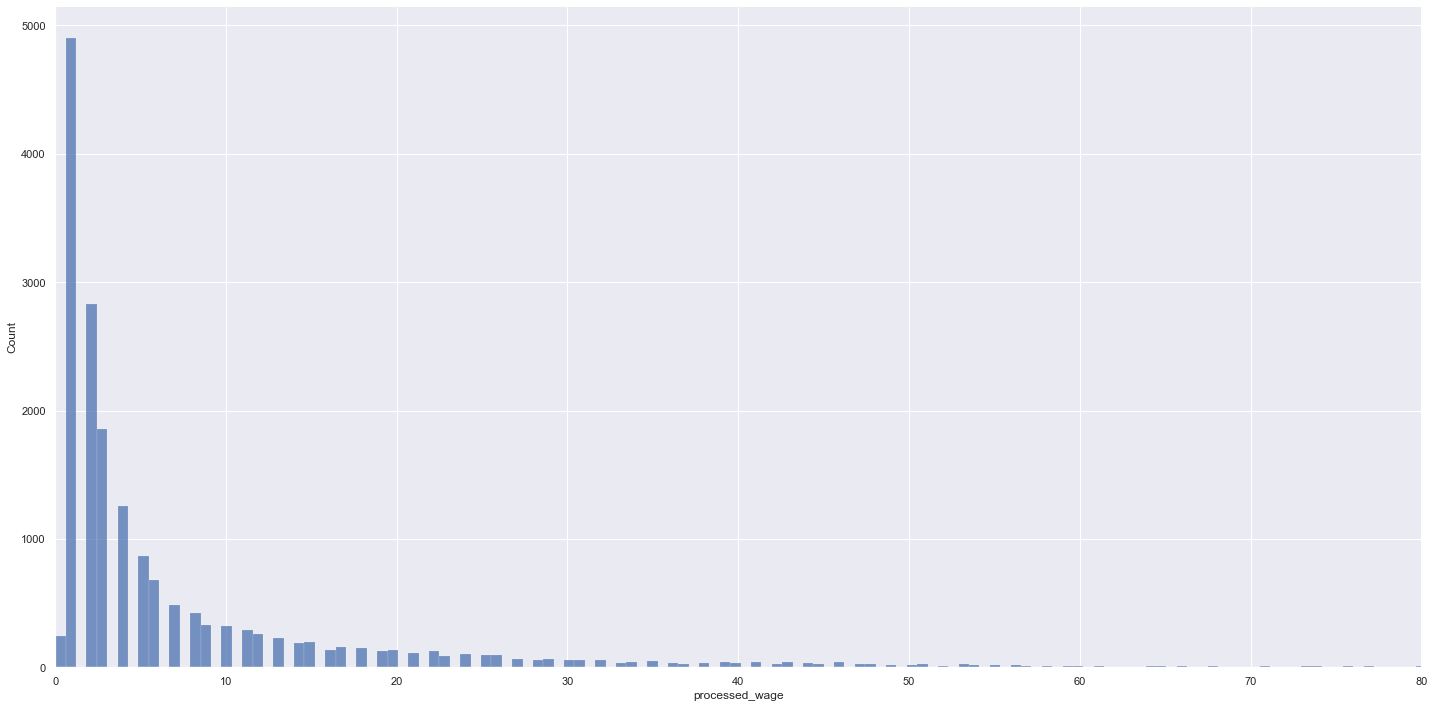

In [57]:
sns.displot(football, x='processed_wage', height=10, aspect=2)
plt.xlim(0, 80)
plt.show()

#### Observation
From above plots, we infer that 'value' and 'wage' values are demonstrating skewed normal distribution, with large number of outliers on high side of data.

## Visualization 2: Distribution in clubs/countries according to some attributes

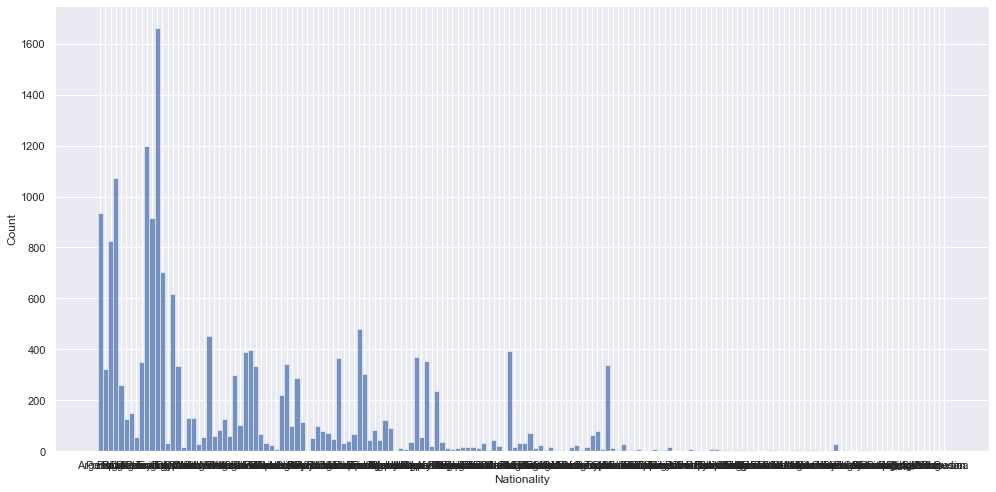

In [27]:
sns.displot(data=football, x='Nationality', height=7, aspect=2)

#### Observation: From above plot we can infer that few nations have much more number of players than rest of the nations. 
For the ease of plotting, we select the top 5 nations based on the number of players they produce. 

In [60]:
# selecting top 5 nations as the total number of nations is too large to shown in the chart
top5 = football['Nationality'].value_counts()[:5]
print(top5)

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


### Plotting the distribution of 'wage' value according to the nation, to see if there exists any discrepency in payscale based on country of origin.

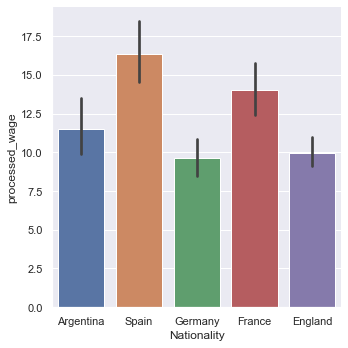

In [37]:
sns.catplot(kind='bar', x='Nationality', y='processed_wage', data=football.loc[football.Nationality.isin(top5.keys())])

#### Observation: The payscale differs clearly according to country. Spain and France seem to have more expensive players than the rest. 

Similarly, we also plot 'overall' i.e. overall quality of player alongside the nationality. We can see in below plot that quality of nearly every nation is same. 

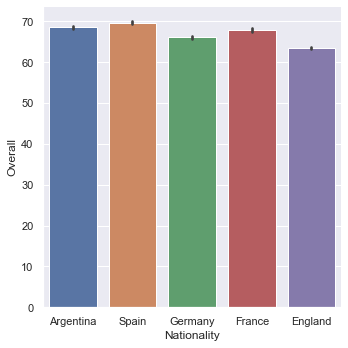

In [43]:
sns.catplot(kind='bar', x='Nationality', y='Overall', data=football.loc[football.Nationality.isin(top5.keys())])

## Visualization 3: Features of players according to position

In [61]:
# First checking the unique positions
len(football['Position'].unique())

28

There exist some position values which are NaN.

### Plotting the feature 'Age' w.r.t the 'Position', to check if certain positions have younger or older players assigned.

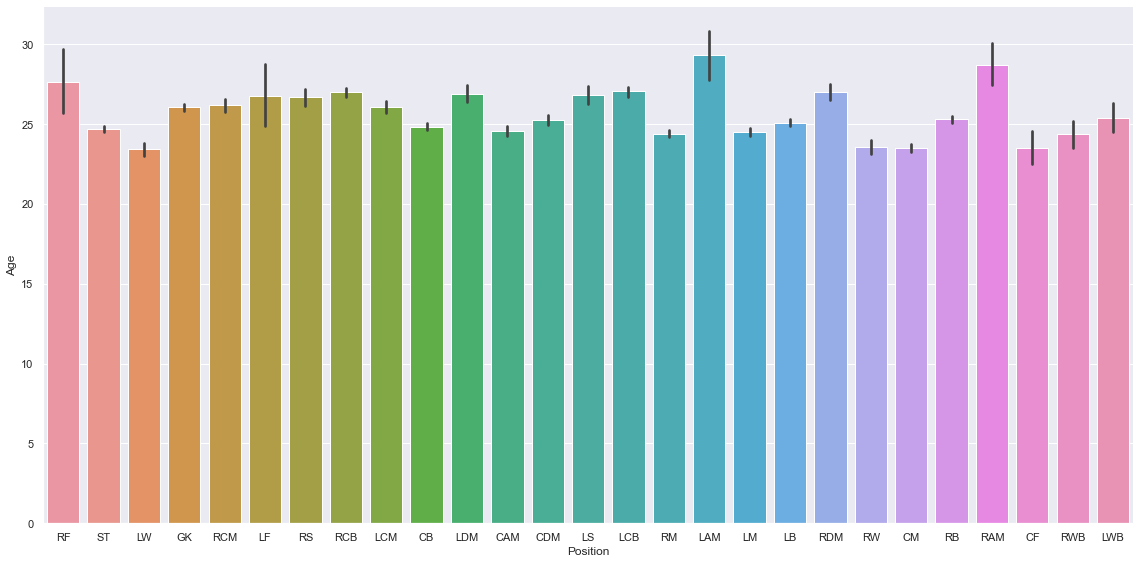

In [3]:
sns.catplot(kind='bar', x='Position', y='Age', data=football, height=8, aspect=2)

#### Observation: We can infer from above plot that certain position like 'LAM', 'RAM' have higer mean age of players i.e. around 29, and certain position like 'LW', 'CM' have lower mean age of players i.e around 23.

### Plotting the feature 'value' w.r.t position, to check if certain position has more or less value attached to it. From the following plt we can infer that certain positions like 'LF', 'RF', 'LAM' have high value associated to them.

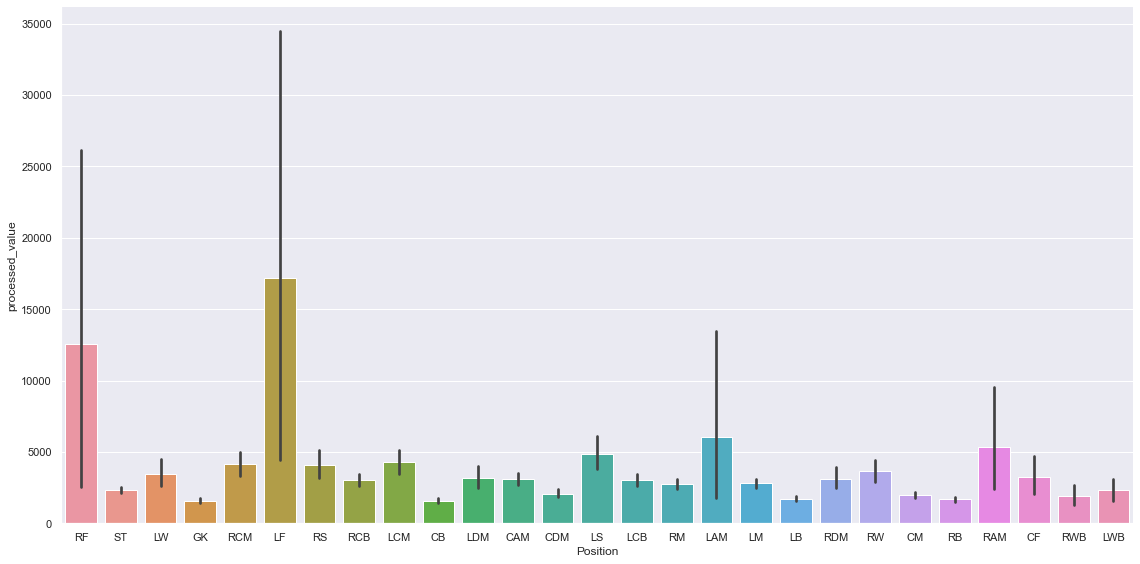

In [62]:
sns.catplot(kind='bar', x='Position', y='processed_value', data=football, height=8, aspect=2)

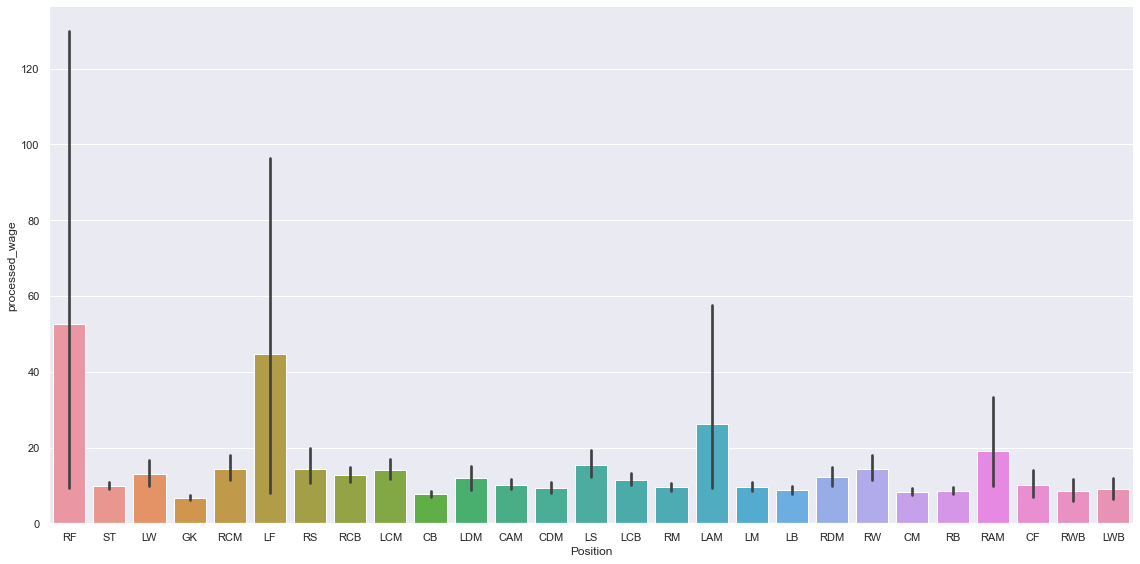

In [8]:
football['processed_wage'] = pd.Series([float(str[1:-1]) if len(str)>=3 else 0 for str in football['Wage']])
sns.catplot(kind='bar', x='Position', y='processed_wage', data=football, height=8, aspect=2)

#### observation: we observe similar trend above in case of wages. Players with certain position have higher wages as compared to other team members.

## visualization 4: Strategy to pick outliers like Messi and Ronaldo

### We adopt a simple technique to detect the outliers in the data in terms of the features like 'wage' and 'value'. We decide to use this as we know that certain players in world are highly rated, with large paycheck and market value. So , we thought that these might be the right features to detect such outliers if any.

C:\Users\Shivprasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


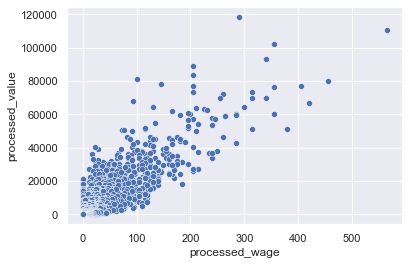

In [63]:
sns.scatterplot(football['processed_wage'], football['processed_value'])

#### Observation: From above plot, we can clearly see that among our ~18k players, only a handful are located in top right corner of the plot, which means they bear high market value and earn a lot of money as compared to the other players. Outliers like Ronaldo and Messi can be easily found in the top right corner of the plot.